In [2]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader
from sklearn.model_selection import train_test_split

In [3]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("using device:",device )

using device: cuda


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Fmist/archive/fashion-mnist_train.csv')

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


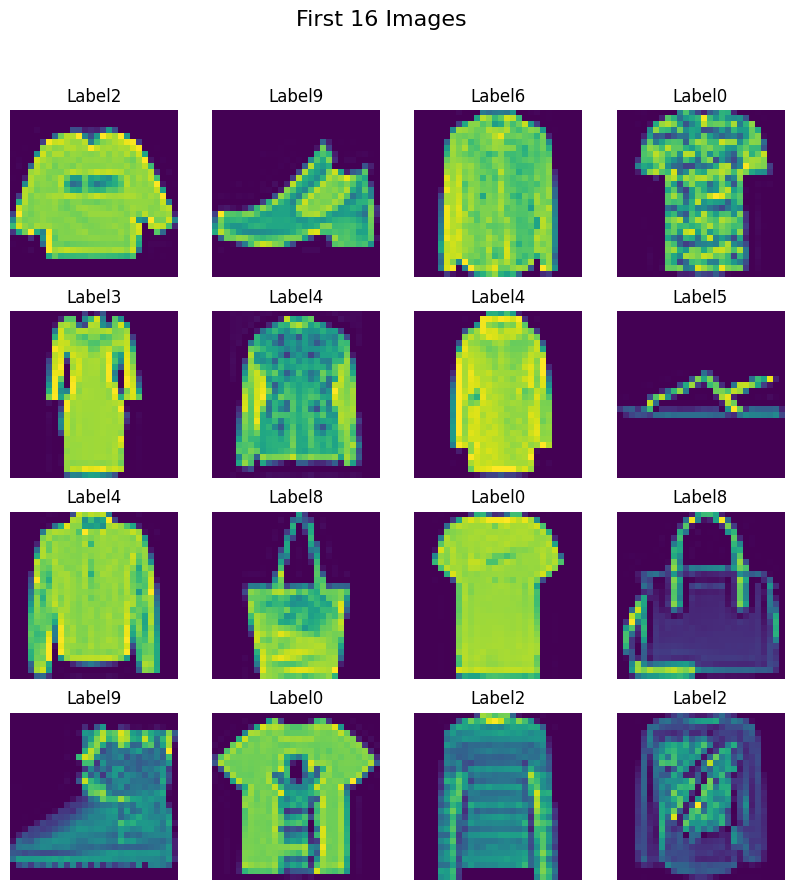

In [6]:
fig,axes=plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 Images ",fontsize=16)
axes=axes.ravel()
for i,ax in enumerate(axes.flat):
  img=df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(f"Label{df.iloc[i,0]}")
plt.show()


In [7]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train=X_train/255.0
X_test=X_test/255.0

In [10]:
# Custom Dataset class
class CustomDataset(Dataset):
  def __init__(self,X,y):
    self.input=torch.tensor(X,dtype=torch.float32)
    self.labels=torch.tensor(y,dtype=torch.long)
  def __len__(self):
    return len(self.input)
  def __getitem__(self,idx):
    return self.input[idx],self.labels[idx]


In [26]:
train_dataset=CustomDataset(X_train,y_train)
test_dataset=CustomDataset(X_test,y_test)

In [27]:
# Data Loaders
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True,pin_memory=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False,pin_memory=True)

In [28]:
# Neural Network
class FashionNet(nn.Module):
  def __init__(self,inputs):
    super(FashionNet,self).__init__()
    self.network=nn.Sequential(
        nn.Linear(inputs,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(64,10)
    )
  def forward(self,input):
    x=self.network(input)
    return x

In [42]:
# learning rate and epochs
learning_rate=0.001
epochs=100

In [43]:
model=FashionNet(X_train.shape[1])
model=model.to(device)
loss_function=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=learning_rate,weight_decay=1e-4)

In [44]:
# training loop
for epoch in range(epochs):
  total_epoch=0
  for batch_features,batch_labels in train_loader:
    batch_features,batch_labels=batch_features.to(device),batch_labels.to(device)
    y_pred=model(batch_features)
    loss=loss_function(y_pred,batch_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_epoch=total_epoch+loss.item()

  avg_loss=total_epoch/len(train_loader)
  print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

Epoch 1/100, Loss: 0.5561
Epoch 2/100, Loss: 0.3993
Epoch 3/100, Loss: 0.3656
Epoch 4/100, Loss: 0.3392
Epoch 5/100, Loss: 0.3216
Epoch 6/100, Loss: 0.3072
Epoch 7/100, Loss: 0.2961
Epoch 8/100, Loss: 0.2866
Epoch 9/100, Loss: 0.2761
Epoch 10/100, Loss: 0.2715
Epoch 11/100, Loss: 0.2646
Epoch 12/100, Loss: 0.2547
Epoch 13/100, Loss: 0.2505
Epoch 14/100, Loss: 0.2457
Epoch 15/100, Loss: 0.2389
Epoch 16/100, Loss: 0.2377
Epoch 17/100, Loss: 0.2318
Epoch 18/100, Loss: 0.2270
Epoch 19/100, Loss: 0.2248
Epoch 20/100, Loss: 0.2196
Epoch 21/100, Loss: 0.2178
Epoch 22/100, Loss: 0.2127
Epoch 23/100, Loss: 0.2113
Epoch 24/100, Loss: 0.2082
Epoch 25/100, Loss: 0.2050
Epoch 26/100, Loss: 0.2041
Epoch 27/100, Loss: 0.2015
Epoch 28/100, Loss: 0.2001
Epoch 29/100, Loss: 0.1977
Epoch 30/100, Loss: 0.1950
Epoch 31/100, Loss: 0.1935
Epoch 32/100, Loss: 0.1916
Epoch 33/100, Loss: 0.1890
Epoch 34/100, Loss: 0.1871
Epoch 35/100, Loss: 0.1835
Epoch 36/100, Loss: 0.1829
Epoch 37/100, Loss: 0.1792
Epoch 38/1

In [45]:
model.eval()

FashionNet(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [46]:
correct=0
total=0
for batch_features,batch_labels in test_loader:
  with torch.no_grad():
    batch_features,batch_labels=batch_features.to(device),batch_labels.to(device)
    y_pred=model(batch_features)
    _,predicted=torch.max(y_pred,1)
    total=total+batch_labels.shape[0]
    correct=correct+(predicted==batch_labels).sum().item()
accuracy=correct/total
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 88.49%


In [47]:
correct=0
total=0
for batch_features,batch_labels in train_loader:
  with torch.no_grad():
    batch_features,batch_labels=batch_features.to(device),batch_labels.to(device)
    y_pred=model(batch_features)
    _,predicted=torch.max(y_pred,1)
    total=total+batch_labels.shape[0]
    correct=correct+(predicted==batch_labels).sum().item()
accuracy=correct/total
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 95.25%
